In [7]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
import math  
import numpy.matlib

In [8]:
with h5py.File(r'C:\Users\Morta\Desktop\TU Wien 6-9-2022\August\B42\B42_middle_SQU_180221_start_from_upper.h5','r') as f:
    ls1 = list(f.keys())
    print(ls1)
    
    REF = f.get('ref')
    STT = f.get('state')
    TIME = f.get('time_values')
    VIB = f.get('vib')
    SET = f.get('wfg_settings')
    
    Ref = np.array(REF)
    Stt = np.array(STT)
    Vib = np.array(VIB)
    Time = np.array(TIME)
    Set = np.array(SET)
    
    print(Ref.shape)
    print(Stt.shape)
    print(Vib.shape)
    print(Time.shape)
    print(Set.shape)

['ref', 'state', 'time_values', 'vib', 'wfg_settings']
(9, 1, 251, 10, 16384)
(9, 1, 251, 10, 2)
(9, 1, 251, 10, 16384)
(16384,)
(9, 1, 251, 3)


(9, 251)


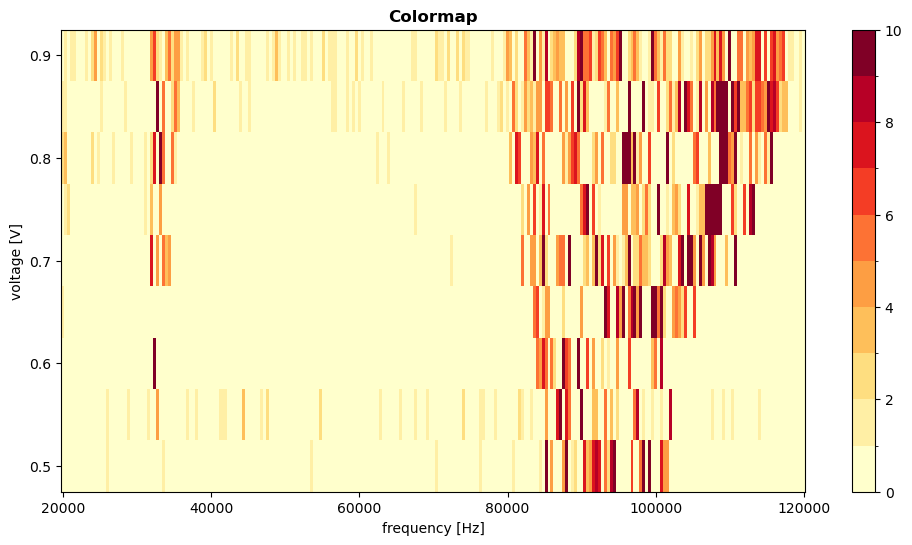

In [10]:
minFreq = 20000
maxFreq = 120000
minVpp = 0.5
maxVpp = 0.9
nVpp = Vib.shape[0]
nFreq = Vib.shape[2]
repetition = Vib.shape[3]

STATE = 0
for i in range(repetition):
    STATE = STATE + Stt[:, 0, :, i, 1]
    
print(STATE.shape)

#for normalization
#STATE = STATE/repetition

dVpp = (maxVpp - minVpp)/(nVpp - 1)
dFreq = (maxFreq - minFreq)/(nFreq - 1)
y, x = np.mgrid[slice(minVpp, maxVpp + dVpp, dVpp),
                slice(minFreq, maxFreq + dFreq, dFreq)]
z = STATE

cmap = plt.get_cmap('YlOrRd')
levels = np.arange(0, repetition + 1, 1)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

img = plt.pcolormesh(x, y, z, cmap=cmap, norm=norm)
plt.colorbar(img)

plt.title('Colormap', fontweight ="bold")
plt.xlabel('frequency [Hz]')
plt.ylabel('voltage [V]')

plt.rcParams["figure.figsize"] = (14,7)
plt.show()